In [91]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [92]:
IMAGE_SIZE =256
CHANNELS =3
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=4,
    class_mode='sparse',     #1d numpy array of integer labels
    save_to_dir="AugmentedImages"
)

Found 230 images belonging to 4 classes.


In [93]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.93806005 0.93725497 0.9317233 ]
  [0.93716705 0.93484926 0.92709404]
  [0.9263612  0.92788655 0.93413216]
  ...
  [0.909804   0.9088217  0.9058824 ]
  [0.909804   0.9085078  0.9058824 ]
  [0.909804   0.9081939  0.9058824 ]]

 [[0.93790305 0.93725497 0.93203723]
  [0.93795186 0.93532014 0.9267801 ]
  [0.92541945 0.92741567 0.9339752 ]
  ...
  [0.91126794 0.9034248  0.9058824 ]
  [0.9117388  0.9038957  0.9058824 ]
  [0.91220963 0.9043665  0.9058824 ]]

 [[0.9377461  0.93725497 0.9323511 ]
  [0.9387366  0.935791   0.9264662 ]
  [0.9244777  0.92694473 0.9338182 ]
  ...
  [0.920599   0.91324073 0.90685207]
  [0.9202851  0.91308373 0.907166  ]
  [0.91997117 0.91292673 0.90747994]]

 ...

 [[0.9380537  0.939579   0.9349309 ]
  [0.9378968  0.93989295 0.934617  ]
  [0.9377398  0.9402068  0.93430305]
  ...
  [0.8916506  0.89508736 0.901476  ]
  [0.9004969  0.8975513  0.8950937 ]
  [0.8985304  0.89117837 0.89754814]]

 [[0.9434943  0.94117653 0.93645304]
  [0.9438082  0.94117653 0.93661004]


In [94]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator =validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=4,
    class_mode='sparse',     #1d numpy array of integer labels
)

Found 218 images belonging to 4 classes.


In [95]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=4,
    class_mode='sparse',     #1d numpy array of integer labels
)

Found 220 images belonging to 4 classes.


In [96]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [97]:
#input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
input_shape = (4, 256, 256, 3)
n_classes=4
model = models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape= input_shape)

In [98]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (4, 256, 256, 3)          0         
                                                                 
 input_9 (InputLayer)        multiple                  0         
                                                                 
 conv2d_60 (Conv2D)          (4, 254, 254, 32)         896       
                                                                 
 max_pooling2d_60 (MaxPoolin  (4, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (4, 125, 125, 64)         18496     
                                                                 
 max_pooling2d_61 (MaxPoolin  (4, 62, 62, 64)          0         
 g2D)                                                

In [99]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [100]:
history= model.fit(
    train_generator,
    steps_per_epoch= len(train_generator)//4,
    batch_size= 4,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//4,
    verbose=1,
    epochs=40
)

Epoch 1/40
14/14 [==============================] - 13s 868ms/step - loss: 1.3812 - accuracy: 0.2857 - val_loss: 1.3631 - val_accuracy: 0.2308
Epoch 2/40
14/14 [==============================] - 12s 860ms/step - loss: 1.3826 - accuracy: 0.2857 - val_loss: 1.3650 - val_accuracy: 0.3077
Epoch 3/40
14/14 [==============================] - 12s 853ms/step - loss: 1.3682 - accuracy: 0.3214 - val_loss: 1.3535 - val_accuracy: 0.2692
Epoch 4/40
14/14 [==============================] - 12s 873ms/step - loss: 1.3688 - accuracy: 0.2500 - val_loss: 1.3293 - val_accuracy: 0.3077
Epoch 5/40
14/14 [==============================] - 11s 802ms/step - loss: 1.3482 - accuracy: 0.2679 - val_loss: 1.3552 - val_accuracy: 0.2692
Epoch 6/40
14/14 [==============================] - 11s 809ms/step - loss: 1.3519 - accuracy: 0.3750 - val_loss: 1.3037 - val_accuracy: 0.4038
Epoch 7/40
14/14 [==============================] - 11s 835ms/step - loss: 1.3236 - accuracy: 0.3214 - val_loss: 1.2978 - val_accuracy: 0.3077

In [101]:
scores = model.evaluate(test_generator)

55/55 [==============================] - 14s 253ms/step - loss: 1.3215 - accuracy: 0.3273


In [102]:
scores

[1.3215428590774536, 0.3272727131843567]

In [103]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 14}

In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
acc = history.history["accuracy"]
val_acc= history.history["val_accuracy"]
loss= history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'training and validation loss')

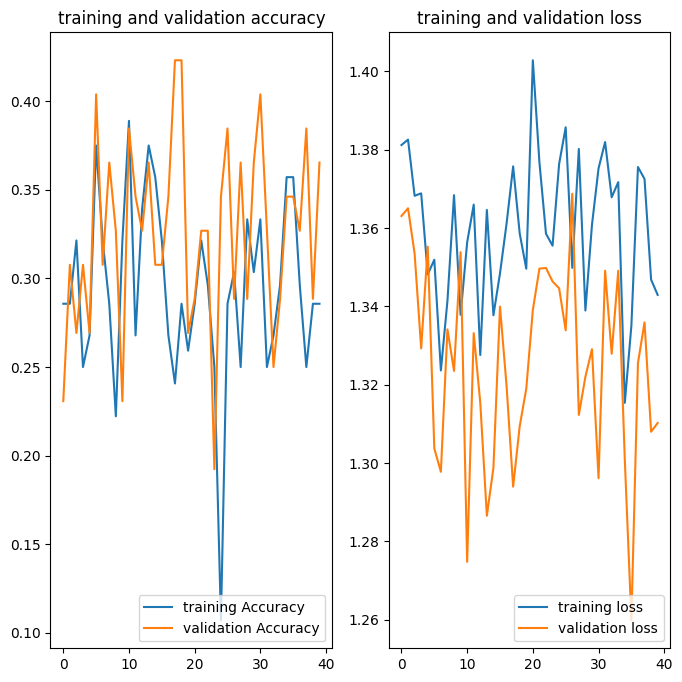

In [106]:
EPOCHS=40
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="validation Accuracy")
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="training loss")
plt.plot(range(EPOCHS),val_loss, label="validation loss")
plt.legend(loc="lower right")
plt.title("training and validation loss")


In [107]:
import numpy
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size= (256,256),
    batch_size = 4 
)
class_names = dataset.class_names
while x<3:
    for images_batch, labels_batch in test_generator:
        first_image= images_batch[0]
        first_label= int(labels_batch[0])
        
        print("first image to predict")
        plt.imshow(first_image)
        print("actual label:",class_names[first_label])
        
        batch_prediction= model.predict(images_batch)
        print("predicted label:", class_names[numpy.argmax(batch_prediction[0])])
    break

Found 238 files belonging to 4 classes.
first image to predict
actual label: Phosphorus
1/1 [==============================] - 0s 158ms/step
predicted label: Potassium
first image to predict
actual label: Potassium
1/1 [==============================] - 0s 59ms/step
predicted label: Potassium
first image to predict
actual label: Phosphorus
1/1 [==============================] - 0s 75ms/step
predicted label: Potassium
first image to predict
actual label: Fully Nutritional
1/1 [==============================] - 0s 66ms/step
predicted label: Potassium
first image to predict
actual label: Nitrogen
1/1 [==============================] - 0s 75ms/step
predicted label: Potassium
first image to predict
actual label: Nitrogen
1/1 [==============================] - 0s 84ms/step
predicted label: Potassium
first image to predict
actual label: Fully Nutritional
1/1 [==============================] - 0s 68ms/step
predicted label: Potassium
first image to predict
actual label: Phosphorus
1/1 [========

KeyboardInterrupt: 

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)  #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[numpy.argmax(predictions[0])]
    confidence = round(100 *(numpy.max(predictions[0])),2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(3):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n confidence:{confidence}%")
        plt.axis("off")
    break

In [ ]:
model.save("../lettuce.h5")